In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np
# Load the MNIST dataset
(x_train , y_train), (x_test, y_test) = mnist.load_data()


In [4]:
x_train_reshaped = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_reshaped = x_test.reshape(x_test.shape[0] ,28 *28)
# reshaping

x_train_normalized = x_train_reshaped / 255.0
x_test_normalized = x_test_reshaped / 255.0
# range normalisation or min-max normalisation


print("Training Data shape:", x_train_normalized.shape)
print("Test Data shape:", x_test_normalized.shape)



Training Data shape: (60000, 784)
Test Data shape: (10000, 784)


In [5]:
import numpy as np

class BasicNeuron:
    def __init__(self, num_inputs, activation_function):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand(1)
        self.activation_function = activation_function

    def forward(self, inputs):
        inputs = np.asarray(inputs).reshape(-1)
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activation_function(weighted_sum)
        return output

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a neuron with 3 inputs and sigmoid activation
neuron = BasicNeuron(3, sigmoid)

# Example inputs
inputs = np.array((0.6, 0.2, 0.9))

# Get neuron output
output = neuron.forward(inputs)
print("Neuron Output:", output)


Neuron Output: [0.72073858]


In [6]:
class individual_score:
    def __init__(self,num):
        self.num = num
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0
        self.recall = []
        self.precision = []
        self.accuracy = []
    
    def reset_counts(self):
        self.tp = self.tn = self.fp = self.fn = 0
    def compute_and_store(self):
        precision = self.tp / (self.tp + self.fp) if (self.tp + self.fp) > 0 else 0
        recall = self.tp / (self.tp + self.fn) if (self.tp + self.fn) > 0 else 0
        accuracy = (self.tp + self.tn) / (self.tp + self.fp + self.fn + self.tn) if (self.tp + self.fp + self.fn + self.tn) > 0 else 0

        self.precision.append(precision)
        self.recall.append(recall)
        self.accuracy.append(accuracy)


In [48]:
class MultiClassPerceptron:
  def __init__(self, num_inputs, num_classes, learning_rate=0.01):

    self.lr = learning_rate


    # Use identity activation so forward(x) returns raw score
    self.neurons = [
        BasicNeuron(num_inputs, activation_function=lambda z: z)
        for _ in range(num_classes)
    ]

  def predict(self, x):
    """
    Compute each neuron's score and pick the class with highest score
    """
    scores = np.array([n.forward(x) for n in self.neurons])
    return np.argmax(scores)

  def train(self, X, y, epochs=10):
    """
    X: shape (n_samples, num_inputs)
    y: integer labels in [0 ... num_classes - 1]
    """
    n = X.shape[0]
    all_digits = [individual_score(i) for i in np.unique(y)]
    self.curr_lr = self.lr
    for epoch in range(epochs):

      perm = np.random.permutation(n)
      mistakes = 0
      


      for i in perm:
        x_i, y_i = X[i], y[i]
        y_hat = self.predict(x_i)

        if y_hat != y_i: # error was made

          mistakes += 1

          # Reinforce true class
          self.neurons[y_i].weights += self.curr_lr * x_i
          self.neurons[y_i].bias += self.curr_lr
          # Penalize predicted class
          self.neurons[y_hat].weights -= self.curr_lr * x_i
          self.neurons[y_hat].bias -= self.curr_lr
          self.curr_lr = max(self.curr_lr * 0.99, 0.0001)
      for digit in all_digits:
        digit.reset_counts()
      for i in range(X.shape[0]):
        pred = self.predict(X[i])
        for digit in all_digits:
          if y[i] == digit.num and pred == digit.num:     # True Positive
            digit.tp += 1
          elif y[i] != digit.num and pred != digit.num:   # True Negative
              digit.tn += 1
          elif y[i] != digit.num and pred == digit.num:   # False Positive
              digit.fp += 1
          elif y[i] == digit.num and pred != digit.num:   # False Negative
              digit.fn += 1
      for digit in all_digits:
        digit.compute_and_store()

        


      err_rate = mistakes / n
      print(f"Epoch {epoch + 1}/{epochs} - Error rate: {err_rate:.4f}")

    print("Training complete.")
    return all_digits

  def evaluate(self, X, y):
    preds = np.array([self.predict(xi) for xi in X])
    return np.mean(preds == y)

In [51]:
mcp = MultiClassPerceptron(
    num_inputs=28 * 28,
    num_classes=10,
    learning_rate=0.1
)

# Train & evvaluate
all_digits = mcp.train(x_train_normalized, y_train, epochs=50)

Epoch 1/50 - Error rate: 0.2283
Epoch 2/50 - Error rate: 0.2044
Epoch 3/50 - Error rate: 0.1909
Epoch 4/50 - Error rate: 0.1814
Epoch 5/50 - Error rate: 0.1749
Epoch 6/50 - Error rate: 0.1683
Epoch 7/50 - Error rate: 0.1637
Epoch 8/50 - Error rate: 0.1590
Epoch 9/50 - Error rate: 0.1554
Epoch 10/50 - Error rate: 0.1514
Epoch 11/50 - Error rate: 0.1487
Epoch 12/50 - Error rate: 0.1459
Epoch 13/50 - Error rate: 0.1438
Epoch 14/50 - Error rate: 0.1419
Epoch 15/50 - Error rate: 0.1393
Epoch 16/50 - Error rate: 0.1376
Epoch 17/50 - Error rate: 0.1358
Epoch 18/50 - Error rate: 0.1353
Epoch 19/50 - Error rate: 0.1339
Epoch 20/50 - Error rate: 0.1327
Epoch 21/50 - Error rate: 0.1320
Epoch 22/50 - Error rate: 0.1309
Epoch 23/50 - Error rate: 0.1300
Epoch 24/50 - Error rate: 0.1293
Epoch 25/50 - Error rate: 0.1290
Epoch 26/50 - Error rate: 0.1277
Epoch 27/50 - Error rate: 0.1277
Epoch 28/50 - Error rate: 0.1275
Epoch 29/50 - Error rate: 0.1263
Epoch 30/50 - Error rate: 0.1256
Epoch 31/50 - Error

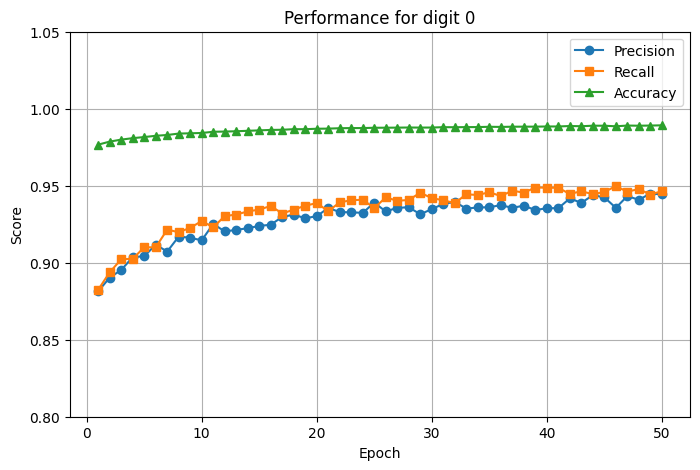

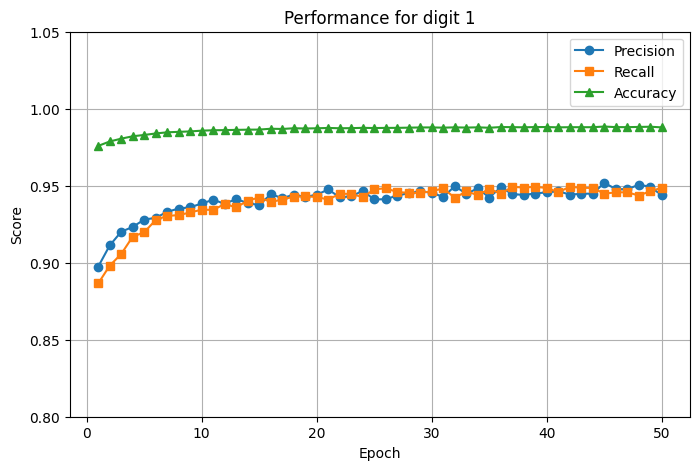

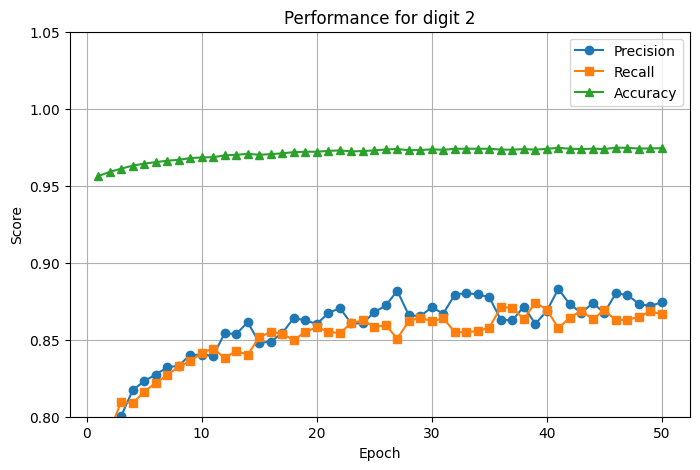

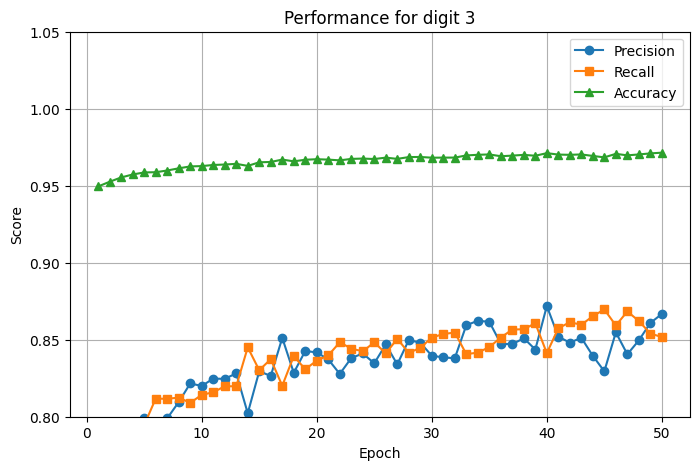

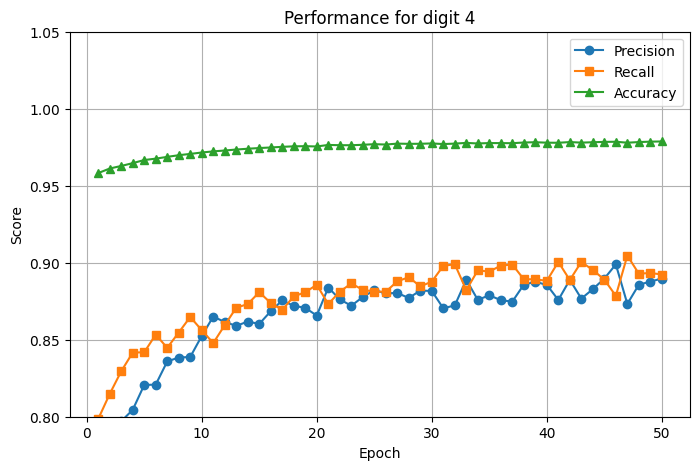

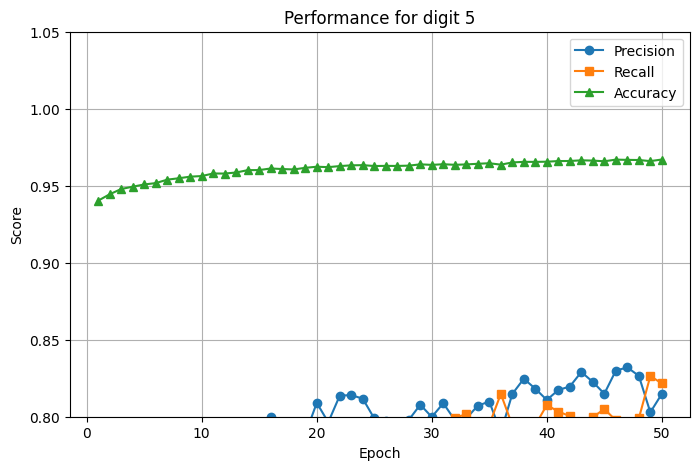

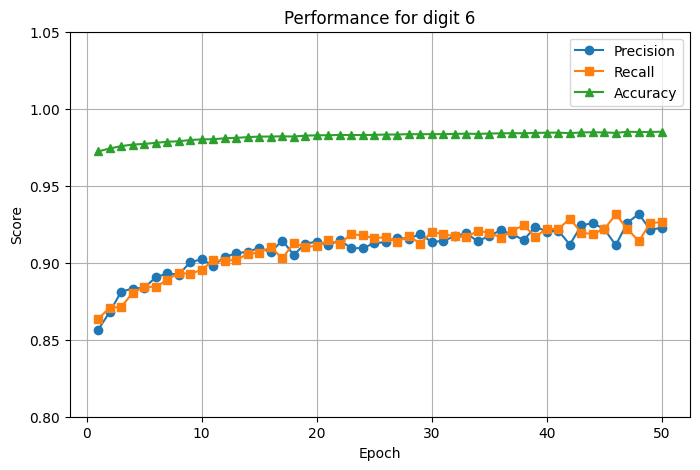

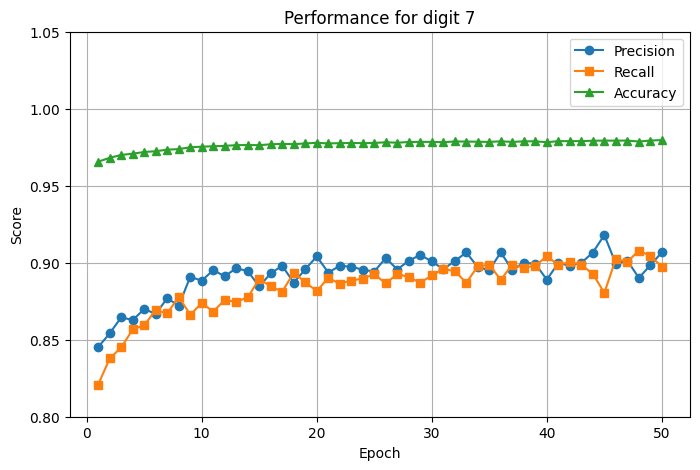

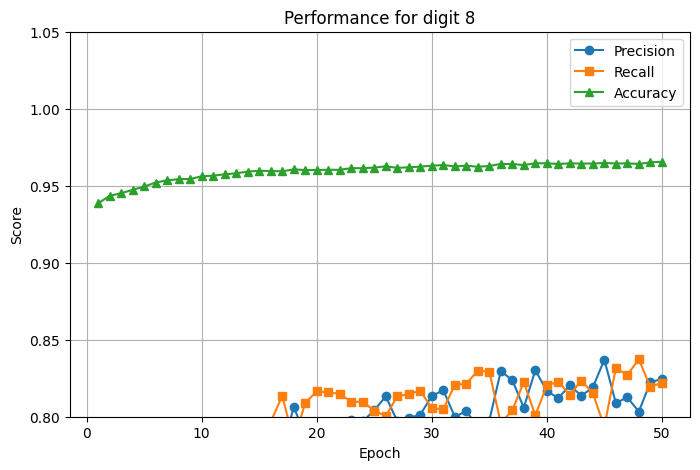

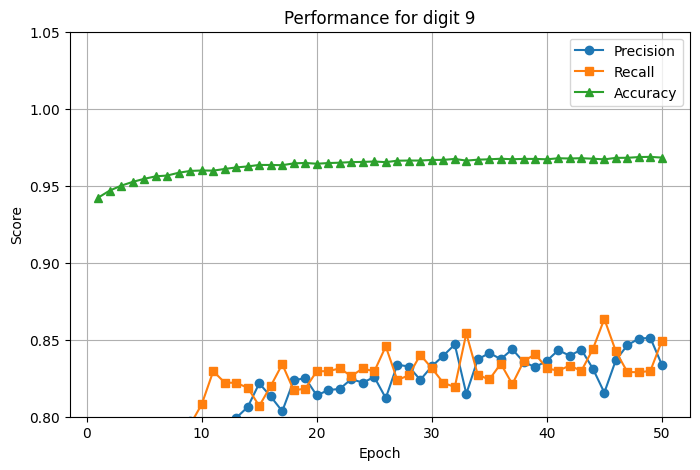

In [52]:
import matplotlib.pyplot as plt


for digit in all_digits:
    epochs = range(1, len(digit.precision) + 1)

    plt.figure(figsize=(8,5))
    plt.plot(epochs, digit.precision, marker='o', label="Precision")
    plt.plot(epochs, digit.recall, marker='s', label="Recall")
    plt.plot(epochs, digit.accuracy, marker='^', label="Accuracy")

    plt.title(f"Performance for digit {digit.num}")
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.ylim(0.8, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
predicted_labels = np.array([mcp.predict(val) for val in x_test_normalized])
classes = 10
conf_matrix = np.zeros((classes, classes), dtype=int)
np.add.at(conf_matrix, (predicted_labels,y_test),1)

In [35]:
print('|'.rjust(7) ,'|'.join(map(lambda x:str(x).center(5,' '), range(10))), '| total')
print('='*75)
for i in range(len(conf_matrix)):
    print(str(i).center(5),'|', '|'.join(map(lambda x:str(x).center(5,' '), conf_matrix[i])),'|', conf_matrix[i].sum())
print('='*75)
print('total |' ,'|'.join(map(lambda x:str(x).center(5,' '), conf_matrix.sum(axis=0))))
print('perc  |' ,'|'.join(map(lambda x:str(round(x,2)).center(5,' '), conf_matrix.max(axis=0)/conf_matrix.sum(axis=0))))



      |   0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9   | total
  0   |  953 |  0  |  6  |  3  |  1  |  11 |  7  |  1  |  7  |  6   | 995
  1   |   0  | 1110|  15 |  1  |  2  |  4  |  3  |  8  |  13 |  9   | 1165
  2   |   2  |  3  | 887 |  21 |  9  |  8  |  9  |  17 |  11 |  4   | 971
  3   |   2  |  1  |  19 | 876 |  4  |  31 |  0  |  7  |  21 |  10  | 971
  4   |   1  |  0  |  10 |  0  | 922 |  12 |  6  |  5  |  10 |  70  | 1036
  5   |   6  |  1  |  2  |  47 |  0  | 751 |  11 |  1  |  40 |  9   | 868
  6   |   7  |  5  |  15 |  3  |  5  |  21 | 916 |  0  |  14 |  1   | 987
  7   |   5  |  3  |  17 |  14 |  11 |  10 |  3  | 971 |  12 | 101  | 1147
  8   |   3  |  12 |  59 |  44 |  12 |  40 |  3  |  7  | 837 |  18  | 1035
  9   |   1  |  0  |  2  |  1  |  16 |  4  |  0  |  11 |  9  | 781  | 825
total |  980 | 1135| 1032| 1010| 982 | 892 | 958 | 1028| 974 | 1009
perc  |  0.97| 0.98| 0.86| 0.87| 0.94| 0.84| 0.96| 0.94| 0.86| 0.77


In [ ]:
"""
|   0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9   | total
===========================================================================
  0   |  953 |  0  |  6  |  3  |  1  |  11 |  7  |  1  |  7  |  6   | 995
  1   |   0  | 1110|  15 |  1  |  2  |  4  |  3  |  8  |  13 |  9   | 1165
  2   |   2  |  3  | 887 |  21 |  9  |  8  |  9  |  17 |  11 |  4   | 971
  3   |   2  |  1  |  19 | 876 |  4  |  31 |  0  |  7  |  21 |  10  | 971
  4   |   1  |  0  |  10 |  0  | 922 |  12 |  6  |  5  |  10 |  70  | 1036
  5   |   6  |  1  |  2  |  47 |  0  | 751 |  11 |  1  |  40 |  9   | 868
  6   |   7  |  5  |  15 |  3  |  5  |  21 | 916 |  0  |  14 |  1   | 987
  7   |   5  |  3  |  17 |  14 |  11 |  10 |  3  | 971 |  12 | 101  | 1147
  8   |   3  |  12 |  59 |  44 |  12 |  40 |  3  |  7  | 837 |  18  | 1035
  9   |   1  |  0  |  2  |  1  |  16 |  4  |  0  |  11 |  9  | 781  | 825
===========================================================================
total |  980 | 1135| 1032| 1010| 982 | 892 | 958 | 1028| 974 | 1009
perc  |  0.97| 0.98| 0.86| 0.87| 0.94| 0.84| 0.96| 0.94| 0.86| 0.77
"""